In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import random


In [2]:
df = pd.read_excel('Year7Data - 2023.xlsx', sheet_name='Sheet1')#, usecols='A, B, C, D, E')
# df = df.sort_values(by='Total', ascending=True)
# df = df.reset_index(drop=True)
print(df)

     CT1  CT2  Port  Total I Grade
0     95   92    88     92       A
1     53   68    38     56       C
2     63   54    62     59       C
3     91   57    74     74       B
4     98   86    92     92       A
..   ...  ...   ...    ...     ...
218   81   76    71     77       B
219   49   68    74     61       C
220   40   35    58     41       D
221   81   76    85     80       A
222   53   38    44     45       D

[223 rows x 5 columns]


In [3]:
# df = pd.read_excel('Year7Data - 2023.xlsx', sheet_name='Sheet2', usecols='D, E')
# df = df.sort_values(by='Total', ascending=True)
# df = df.reset_index(drop=True)
# print(df)

In [4]:
classes = []
grades = df.loc[:,"I Grade"]
x1 = df.loc[:,"CT1"]
x2 = df.loc[:,"CT2"]
y = df.loc[:,"Total"]
# y = y.astype(int)
# print(x)
# print(y)
for n in range(0,len(y)):
  # x.append(n+1)
  grade = grades[n]
  if grade == "A":
     classes.append(0)#purple
    #  x.append(5)
  elif grade == "B":
    classes.append(1)#dark blue
    # x.append(4)
  elif grade == "C":
    classes.append(2)#aquamarine
    # x.append(3)
  elif grade == "D":
    classes.append(3)#green
    # x.append(2)
  else:
    classes.append(4)#yellow
    # x.append(1)

slope, intercept, r, p, std_err = stats.linregress(x1, y)

def myfunc(x):
  return slope * x + intercept

data = list(zip(x1, y, classes))
# print(data)

mymodel = list(map(myfunc, x1))


In [5]:
new_x = random.randint(min(x1), max(x2))
print(new_x)
new_y = myfunc(new_x)
roundY = round(new_y)
# plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])

95


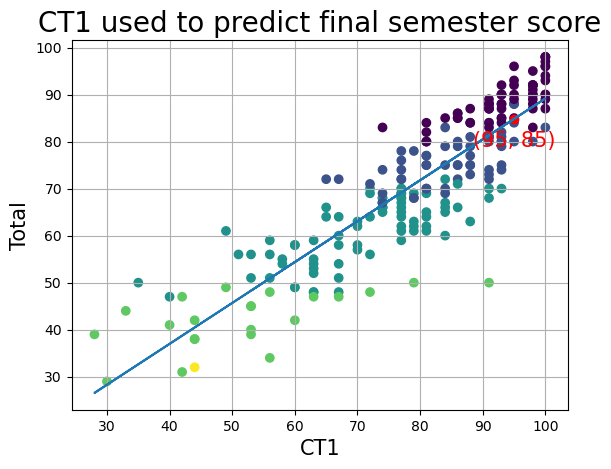

In [6]:
plt.scatter(x1, y, c=classes)# grades have been colour coded
plt.scatter(new_x, new_y, c='red')
plt.annotate(f'({new_x}, {roundY})', (new_x, new_y), textcoords="offset points", xytext=(0,-20), ha='center', c='red', fontsize=15)
plt.plot(x1, mymodel)
plt.xlabel('CT1', fontsize=15)
plt.ylabel('Total', fontsize=15)
plt.title('CT1 used to predict final semester score', fontsize=20)
plt.grid()
plt.savefig('main2.png')
plt.show()